In [1]:
from problem_formulation import get_model_for_problem_formulation

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 500 scenarios * 6 policies * 1 model(s) = 3000 experiments
  0%|                                       | 1/3000 [00:05<4:11:39,  5.03s/it]Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py", line 246, in _store_outcomes
    self.results[outcome][case_id,] = outcome_res
KeyError: 'Dike Investment Costs'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/ema_multiprocessing.py", line 253, in run
    self.callback(*result.get())
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py", line 281, in __call__
    self._store_outcomes(experiment.experiment_id, outcomes)
  File "/Us

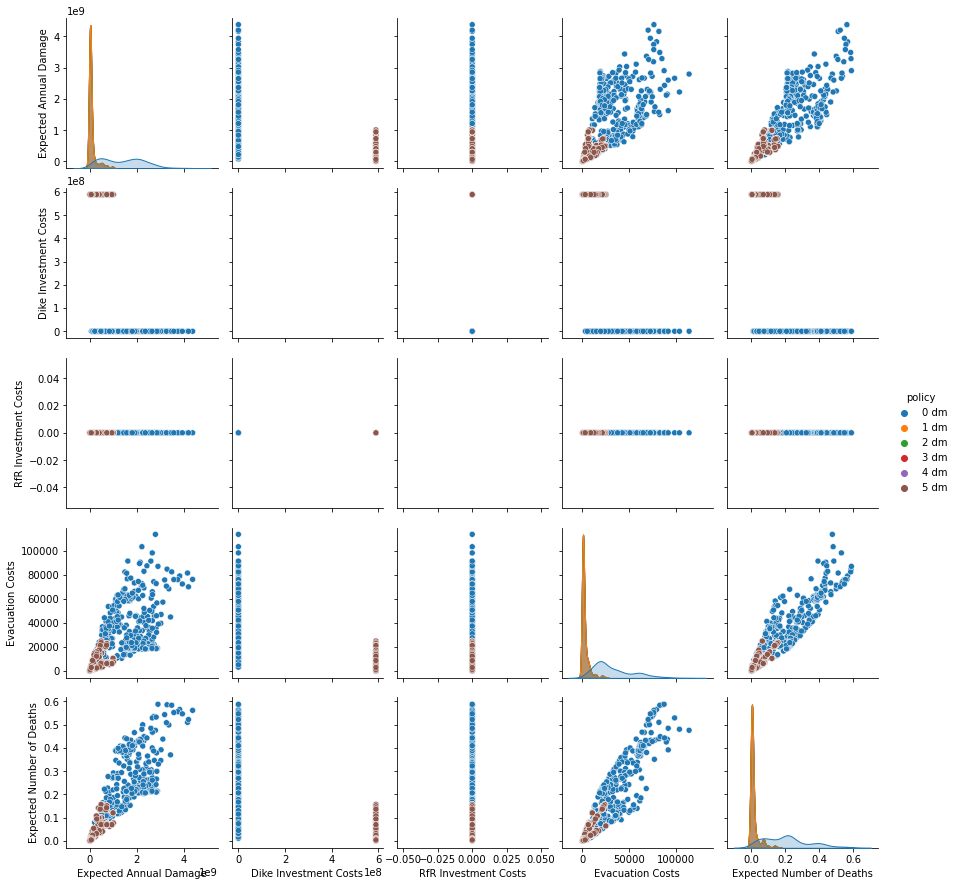

AttributeError: 'tuple' object has no attribute 'to_excel'

In [2]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)
from ema_workbench import (MultiprocessingEvaluator, Policy, save_results)

from ema_workbench.util import ema_logging
import time
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    dike_model, planning_steps = get_model_for_problem_formulation(2)

   
    ###this defines policy 0##############################################################################
    # no dike increase, no warning, none of the rfr
    zero_policy = {'DaysToThreat': 2}
    zero_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
    zero_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    
    pol0 = {}
    for key in dike_model.levers:
        s1, s2 = key.name.split('_')
        pol0.update({key.name: zero_policy[s2]})

    ###this defines policy 1 ##########################
    heightening_policy = {'DaysToThreat': 2}
    heightening_policy.update({'DikeIncrease {}'.format(n): 4 for n in planning_steps})
    heightening_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    
    pol1 = {}
    for key in dike_model.levers:
        s1, s2 = key.name.split('_')
        pol1.update({key.name: heightening_policy[s2]})

    ###this defines policy 2 ##########################
    warning_policy = {'DaysToThreat': 2}
    warning_policy.update({'DikeIncrease {}'.format(n): 4 for n in planning_steps})
    warning_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    pol2 = {}
    for key in dike_model.levers:
        s1, s2 = key.name.split('_')
        pol2.update({key.name: warning_policy[s2]})


    #this defines policy 3 )###################################
    mixed_policy = {'DaysToThreat': 2}
    mixed_policy.update({'DikeIncrease {}'.format(n): 4 for n in planning_steps})
    mixed_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    pol3 = {}
    for key in dike_model.levers:
        s1, s2 = key.name.split('_')
        pol3.update({key.name: mixed_policy[s2]})    


    #this defines policy 4 ###################################
    policy_4 = {'DaysToThreat': 2}
    policy_4.update({'DikeIncrease {}'.format(n): 4 for n in planning_steps})
    policy_4.update({'RfR {}'.format(n): 0 for n in planning_steps})
    pol4 = {}
    for key in dike_model.levers:
        s1, s2 = key.name.split('_')
        pol4.update({key.name: policy_4[s2]})    
        
    #this defines policy 5 ###################################
    policy_5 = {'DaysToThreat': 2}
    policy_5.update({'DikeIncrease {}'.format(n): 4 for n in planning_steps})
    policy_5.update({'RfR {}'.format(n): 0 for n in planning_steps})
    pol5 = {}
    for key in dike_model.levers:
        s1, s2 = key.name.split('_')
        pol5.update({key.name: policy_5[s2]})    

    policy0 = Policy("0 dm", **pol0)
    policy1 = Policy("1 dm", **pol1)
    policy2 = Policy("2 dm", **pol2)  
    policy3 = Policy('3 dm', **pol3)
    policy4 = Policy('4 dm', **pol4)
    policy5 = Policy('5 dm', **pol5)
    
    policies = [policy0, policy1, policy2, policy3, policy4, policy5]
    

#%%
    # with MultiprocessingEvaluator(dike_model) as evaluator:
    #     results = evaluator.perform_experiments(scenarios=50, policies=[policy0,policy1,policy2,policy3],
    #                                             uncertainty_sampling=LHS)
    n_scenarios = 500
    n_policies = len(policies)
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios = n_scenarios,
                                                policies = policies)

    experiments, outcomes = results
    policies2 = experiments['policy']
    data = pd.DataFrame.from_dict(outcomes)
    data['policy'] = policies2
    
    sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
    plt.show()